In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("datasets/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df=df.iloc[:,3:]

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


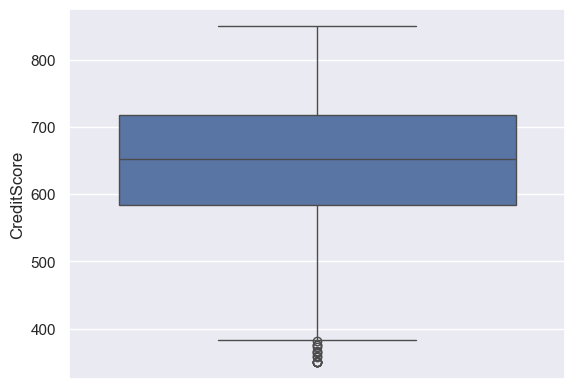

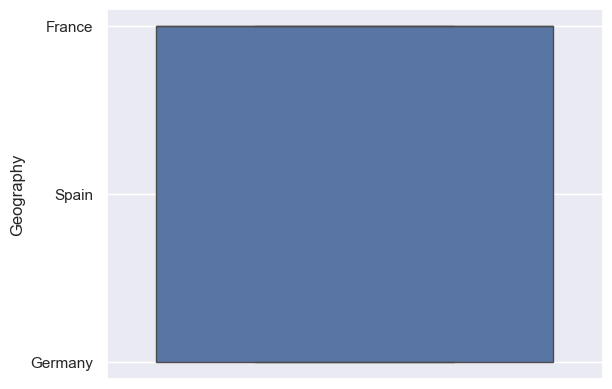

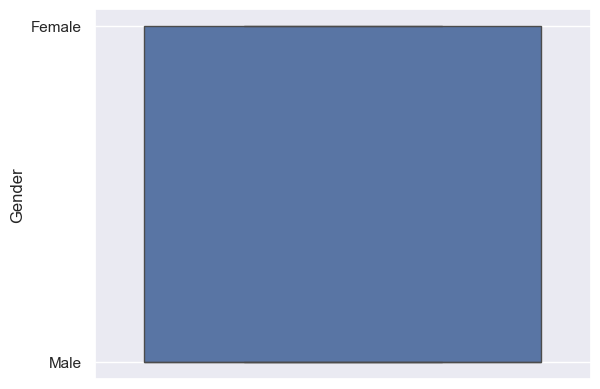

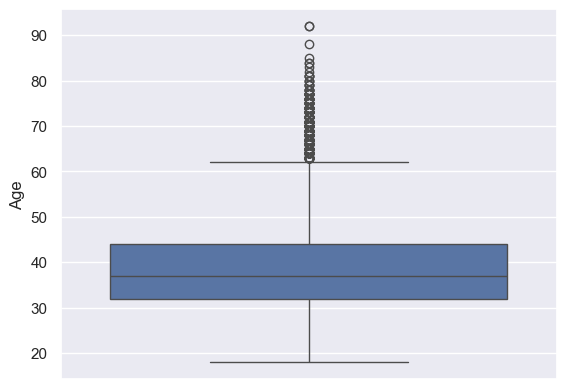

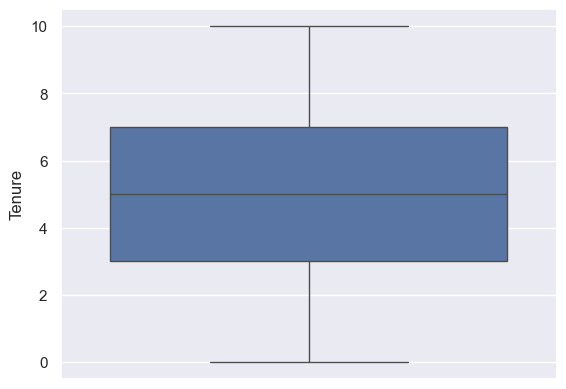

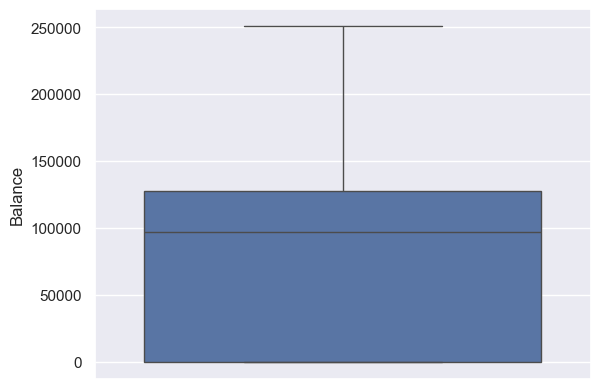

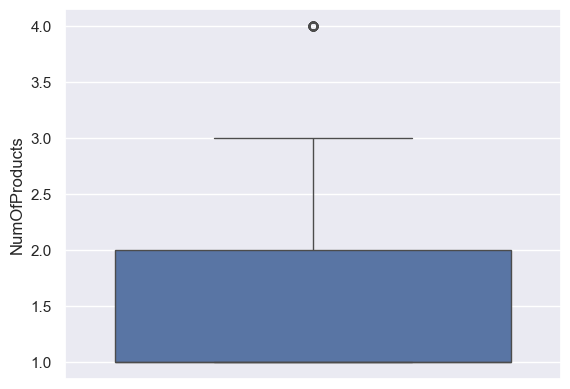

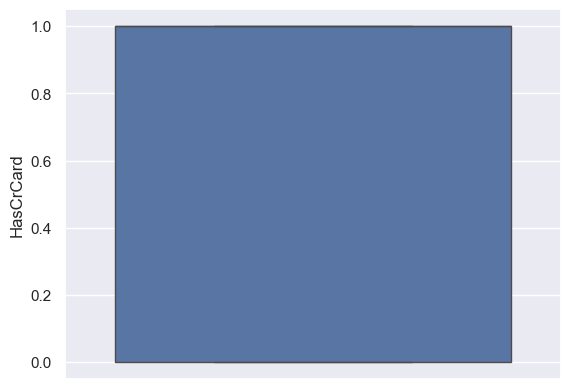

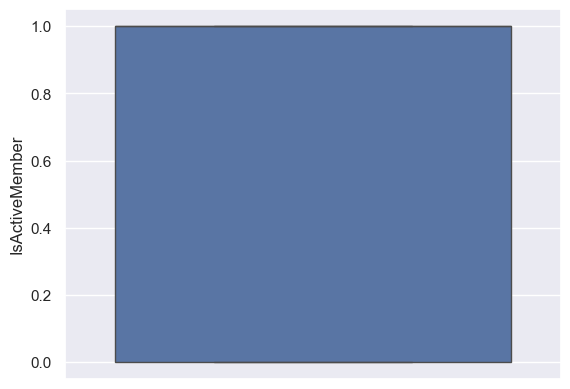

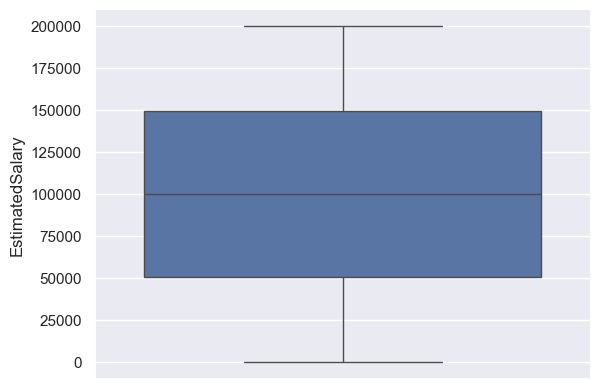

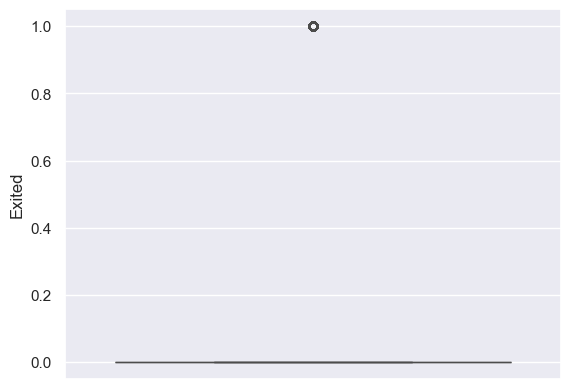

In [8]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.columns)[0:]:
    boxplot(i)

In [9]:
CreditScore_q1=df['CreditScore'].quantile(0.25)
CreditScore_q3=df['CreditScore'].quantile(0.75)
CreditScore_iqr=CreditScore_q3-CreditScore_q1
lower_limit_CreditScore=CreditScore_q1-1.5*CreditScore_iqr
upper_limit_CreditScore=CreditScore_q3+1.5*CreditScore_iqr

In [10]:
df['CreditScore']=np.where(df['CreditScore']>upper_limit_CreditScore ,upper_limit_CreditScore,
                               np.where(df['CreditScore']<lower_limit_CreditScore,lower_limit_CreditScore,
                                       df['CreditScore']
                               )
                               )

In [11]:
Age_q1=df['Age'].quantile(0.25)
Age_q3=df['Age'].quantile(0.75)
Age_iqr=Age_q3-Age_q1
lower_limit_Age=Age_q1-1.5*Age_iqr
upper_limit_Age=Age_q3+1.5*Age_iqr


df['Age']=np.where(df['Age']>upper_limit_Age ,upper_limit_Age,
                               np.where(df['Age']<lower_limit_Age,lower_limit_Age,
                                       df['Age']
                               ))

In [12]:
NumOfProducts_q1=df['NumOfProducts'].quantile(0.25)
NumOfProducts_q3=df['NumOfProducts'].quantile(0.75)
NumOfProducts_iqr=NumOfProducts_q3-NumOfProducts_q1
lower_limit_NumOfProducts=NumOfProducts_q1-1.5*NumOfProducts_iqr
upper_limit_NumOfProducts=NumOfProducts_q3+1.5*NumOfProducts_iqr


df['NumOfProducts']=np.where(df['NumOfProducts']>upper_limit_NumOfProducts ,upper_limit_NumOfProducts,
                               np.where(df['NumOfProducts']<lower_limit_NumOfProducts,lower_limit_NumOfProducts,
                                       df['NumOfProducts']
                               ))

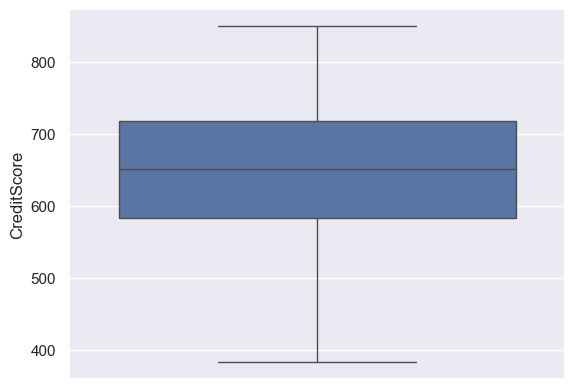

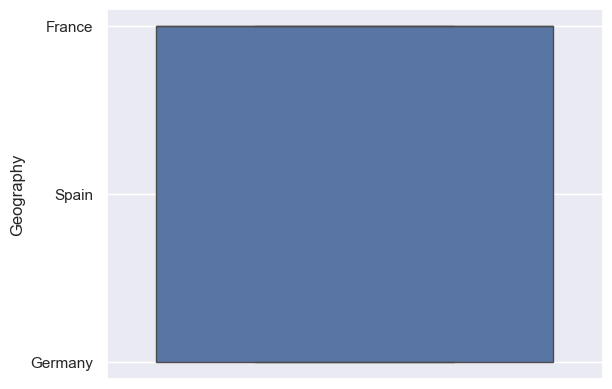

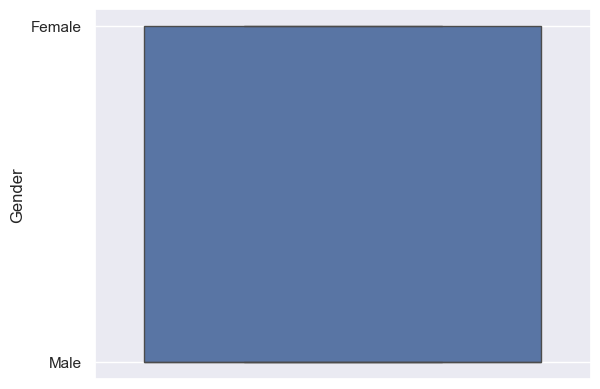

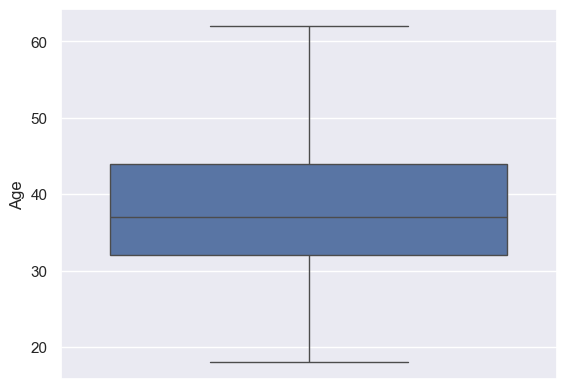

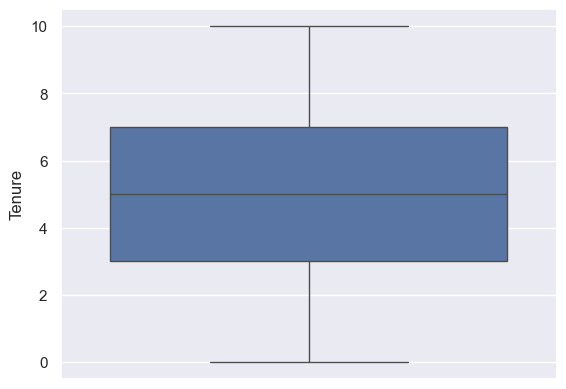

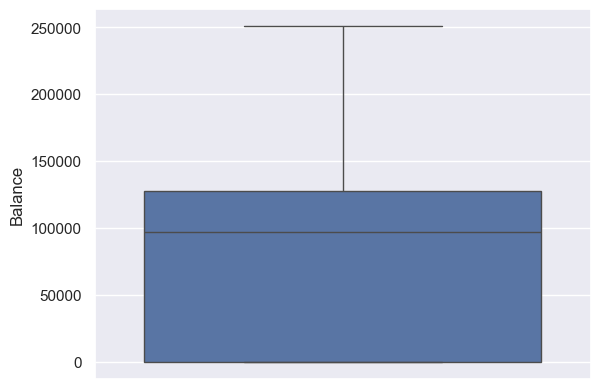

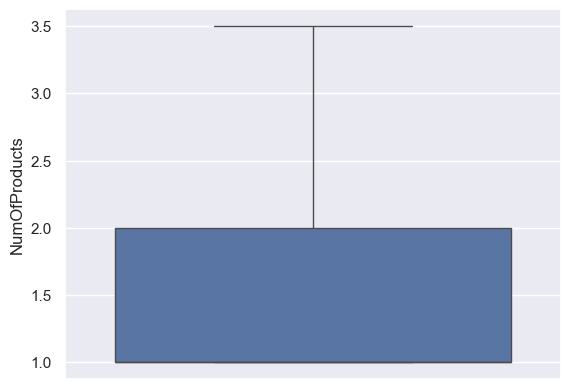

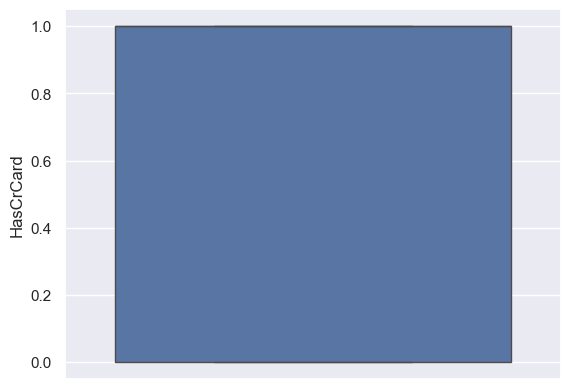

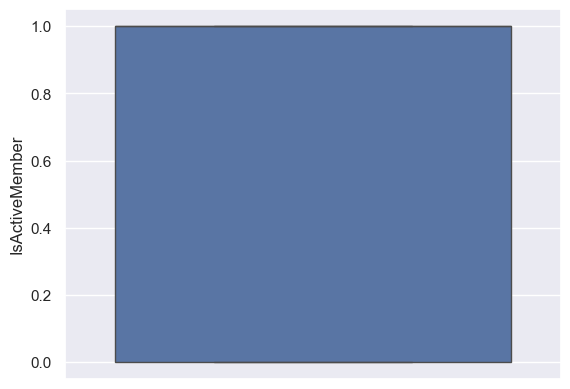

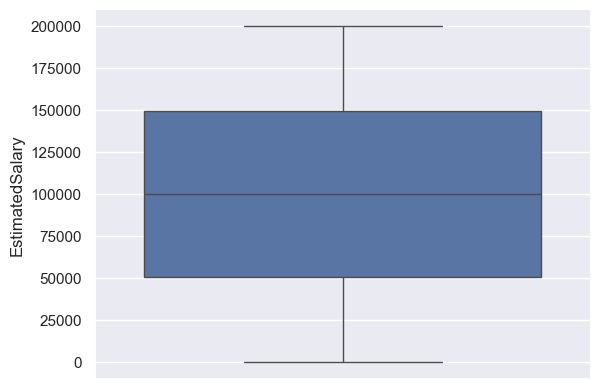

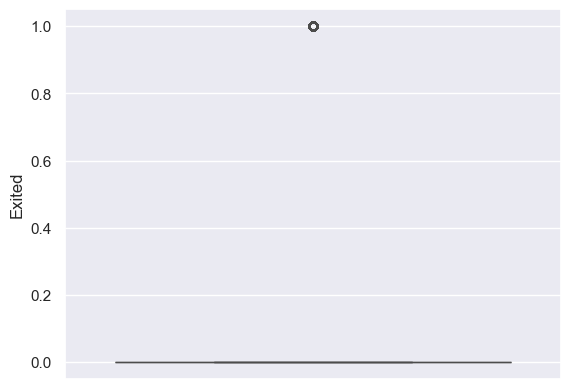

In [13]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.columns)[0:]:
    boxplot(i)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.5+ KB


In [15]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype='int')


In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2,0.00,1.0,1,1,101348.88,1,0,0,0
1,608.0,41.0,1,83807.86,1.0,0,1,112542.58,0,0,1,0
2,502.0,42.0,8,159660.80,3.0,1,0,113931.57,1,0,0,0
3,699.0,39.0,1,0.00,2.0,0,0,93826.63,0,0,0,0
4,850.0,43.0,2,125510.82,1.0,1,1,79084.10,0,0,1,0


In [17]:
df['Geography_Germany'].value_counts()

Geography_Germany
0    7491
1    2509
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int32  
 10  Geography_Spain    10000 non-null  int32  
 11  Gender_Male        10000 non-null  int32  
dtypes: float64(5), int32(3), int64(4)
memory usage: 820.4 KB


In [19]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=df.drop(columns='Exited')

In [22]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2,0.00,1.0,1,1,101348.88,0,0,0
1,608.0,41.0,1,83807.86,1.0,0,1,112542.58,0,1,0
2,502.0,42.0,8,159660.80,3.0,1,0,113931.57,0,0,0
3,699.0,39.0,1,0.00,2.0,0,0,93826.63,0,0,0
4,850.0,43.0,2,125510.82,1.0,1,1,79084.10,0,1,0


In [23]:
y=df['Exited']

In [24]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# feature scaling

In [25]:
import imblearn

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
ros=RandomOverSampler()
x_over,y_over=ros.fit_resample(x,y)

In [28]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [29]:
y_over.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.25,random_state=101,stratify=y_over)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [32]:
x_train

array([[-0.18815115, -1.07837448, -0.68209521, ..., -0.65710801,
         1.83192373,  0.99465594],
       [-1.02014918, -0.48059734, -0.68209521, ..., -0.65710801,
        -0.54587425, -1.00537277],
       [ 0.76560268, -0.97874496,  0.011557  , ..., -0.65710801,
        -0.54587425,  0.99465594],
       ...,
       [ 0.4307742 , -1.27763353, -1.37574743, ..., -0.65710801,
        -0.54587425,  0.99465594],
       [ 1.18160169, -0.67985639,  1.39886143, ..., -0.65710801,
        -0.54587425,  0.99465594],
       [ 0.21770154,  0.1171798 , -1.37574743, ..., -0.65710801,
        -0.54587425, -1.00537277]])

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logit=LogisticRegression()

In [35]:
logit.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred_train_logit=(logit.predict(x_train))
y_pred_test_logit=(logit.predict(x_test))

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
print(accuracy_score(y_train,y_pred_train_logit))
print(accuracy_score(y_test,y_pred_test_logit))

0.7098124581379772
0.7079357106981417


# Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfor=RandomForestClassifier()

In [41]:
rfor.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_pred_train_rfor=(rfor.predict(x_train))
y_pred_test_rfor=(rfor.predict(x_test))

In [43]:
print(accuracy_score(y_train,y_pred_train_rfor))
print(accuracy_score(y_test,y_pred_test_rfor))

1.0
0.9502762430939227


# SVM

In [44]:
from sklearn.svm import SVC

In [50]:
svc_lr=SVC(kernel='linear')
svc_lr=svc_lr.fit(x_train,y_train)
y_pred_train_lr=svc_lr.predict(x_train)
y_pred_test_lr=svc_lr.predict(x_test)
print(accuracy_score(y_train,y_pred_train_lr))
print(accuracy_score(y_test,y_pred_test_lr))

0.7154219691895513
0.7114515318935208


In [55]:
svc_rbf=SVC(kernel='rbf')
svc_rbf=svc_rbf.fit(x_train,y_train)
y_pred_train_rbf=svc_rbf.predict(x_train)
y_pred_test_rbf=svc_rbf.predict(x_test)
print(accuracy_score(y_train,y_pred_train_rbf))
print(accuracy_score(y_test,y_pred_test_rbf))

0.8122906898861353
0.8076343545956806


In [57]:
svc_poly=SVC(kernel='poly')
svc_poly=svc_poly.fit(x_train,y_train)
y_pred_train_poly=svc_poly.predict(x_train)
y_pred_test_poly=svc_poly.predict(x_test)
print(accuracy_score(y_train,y_pred_train_poly))
print(accuracy_score(y_test,y_pred_test_poly))

0.7937039517749498
0.7918131592164741


In [58]:
svc_rbf=SVC(kernel='sigmoid')
svc_rbf=svc_rbf.fit(x_train,y_train)
y_pred_train_rbf=svc_rbf.predict(x_train)
y_pred_test_rbf=svc_rbf.predict(x_test)
print(accuracy_score(y_train,y_pred_train_rbf))
print(accuracy_score(y_test,y_pred_test_rbf))

0.5405224380442063
0.5406830738322451
